# Credit Default Modelling Using Decision Trees

Machine Learning Algorithms have historically been used in Credit and Fraud Space. With increase in computational power, the Industry has made a move from Tree-based Logit models to more advance Machine Learning Techniques involving Bagging and Boosting. Before we dive into the Use Case for Credit Default Modelling, we will take a deep dive on Decision Trees.

## About Me

<img src="About_Me_2.jpg" align='left' >

## Decision Trees

### 1. Introduction
A __Decision Tree__ maps inputs __$ x \in R^d $__ to output __y__ using binary decision rules:
#### Each node in the tree has a splitting Rule
- Splitting based on top down Greedy Algorithm
- Each Leaf Node is associated with an output value

#### Each splitting rule is of the form
- h(x) = 1{xj > t} 

An example Decision Tree is shown below :

<img src="Decision_Trees.jpg" align='left' >

### 2. Splitting Criteria
#### Regression Criteria :
- Mean Squared Error : $ H(X_{m}) = \frac{1}{N_{m}}\ *\sum\limits _{i \in N_{m}} ^{} (y_{i}-y_{mean})^2 $
- Mean Absolute Error : $ H(X_{m}) = \frac{1}{N_{m}}\ *\sum\limits _{i \in N_{m}} ^{} |y_{i}-y_{mean}| $

#### Classification Criteria :
- Gini Index : $ H(X_{m}) = \sum\limits _{k \in y} ^{} (1- p_{mk}) $
- Cross Entropy : $ H(X_{m}) = \sum\limits _{k \in y} ^{} p_{mk}log(p_{mk}) $

    $ X_{m} $ : Observations in node m 
    
    y classes
    
    $ p_{m*} $ distribution over classes in node m 

### 3. Geometrical View
#### Motivation :
- Partition the space so that data in a region have same prediction
- Each partition represents a vertical or horizontal line in 2-D plane

<img src="Geometric_View.jpg" align='left' >

### 4. Challenges

- Decision Trees cannot Extrapolate

<img src="Extrapolate.jpg" align='left' >



- High Variance or Instability to change in data

    - By minor change in data we see variation in Structure of Decision Tree

In the next sections we will discuss how to overcome these challenges

## Bootstrap Aggregator

### 1. Motivation
- __Decision Tree__ can have __high variance__ in them if you use a tree without pruning

- Using Multiple trees can decrease the Variance

    Let $ X_{i} $ be an independent and identical distribution
    
    Then $ Y = \frac{\sum \limits _{k = 1} ^{N} (X_{i})}{N}\ $
    
    $ Var(Y) = Var(\frac{\sum \limits _{k = 1} ^{N} (X_{i})}{N}\ ) $    $ = \frac{\sum \limits _{k = 1} ^{N} (Var(X_{i}))}{N^2}\ $ 
    
    $ Var(Y) = \frac{Var(X_{1})}{N}\ $ 
    


- Bagging or Bootstrap Aggregation is one way of creating $ X_{i}'s $

### 2. Algorithm

1. Generate Bootstrap Samples $ B_{1},B_{2} ...... B_{b} $
    
    Create $ B_{b} $ by picking points from $ {x_{1},x_{2},x_{3}......x_{n}  } $ randomly n times
    
    A particular $ x_{i} $ can appear in $ B_{b} $ many times
    
    
2. Generate estimators $ f(B_{b}) $ using data $ B_{b} $

## Random Forest

### 1. Motivation
- Estimators generated using Bagging Data $ B_{b} $, i.e $ f(B_{b}) $ might not be highly uncorrelated if the nodal structure is similar

- Using Multiple trees can decrease the Variance

    Let $ X_{i} $ be an independent and identical distribution
    
    Then $ Y = \frac{\sum \limits _{k = 1} ^{N} (X_{i})}{N}\ $
    
    $ Var(Y) = Var(\frac{\sum \limits _{k = 1} ^{N} (X_{i})}{N}\ ) $    $ = \frac{\sum \limits _{k = 1} ^{N} (Var(X_{i}))}{N^2}\ $ 
    
    $ Var(Y) = \frac{Var(X_{1})}{N}\ $ 

- Random Forest Algorithm can be used for creating $ X_{i}'s $

### 2. Algorithm

1. Generate Bootstrap Samples $ B_{1},B_{2} ...... B_{b} $
    
    - Create $ B_{b} $ by picking points from $ {x_{1},x_{2},x_{3}......x_{n}  } $ randomly n times
    
    - A particular $ x_{i} $ can appear in $ B_{b} $ many times
    
    
2. Generate estimators $ f(B_{b}) $ using data $ B_{b}, $ where each split is computed as follows

    - Randomly select m dimensions of __$ x \in R^d $__ newly chosen for each b 
    
    - Make the best split restricted to that subset of dimension 

### 3. Out of Bag Error

- For each Bag $ B_{1},B_{2} ...... B_{b} $ find observations which are not in the bag

- For each observation, find trees where observation was not used

    - Run only for those trees and take aggregate
    - Check with original value to generate Out of Bag Error

<img src="Out_Off_Bag.jpg" align='left' >

## Jupyter Lab

Here we explore data from LendingClub.com

Given many different factors including the FICO score of the borrower, the interest rate, and even the purpose of the loan, we attempt to make predictions on whether a particular loan would be paid back in full.

### Why Decision Trees / Random Forests?

Decision trees are a great 'rough and ready' ML technique that can be applied to many different scencarios. They are intuitive, fast, and they can deal with both numerical and categorical data. The biggest drawback of Decision Trees is their tendency to overfit the given data, resulting in error in either variance or bias.
Random forests combat this problem by employing many different Decision Trees on random samples of the data, and so are usually a more sensible choice when choosing a ML model.

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Analysis

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The 'not.fully.paid' column is the one we are interested in predicting.

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### **Some columns Information**
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Data visualization

C:\Users\jsiit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='purpose', ylabel='count'>

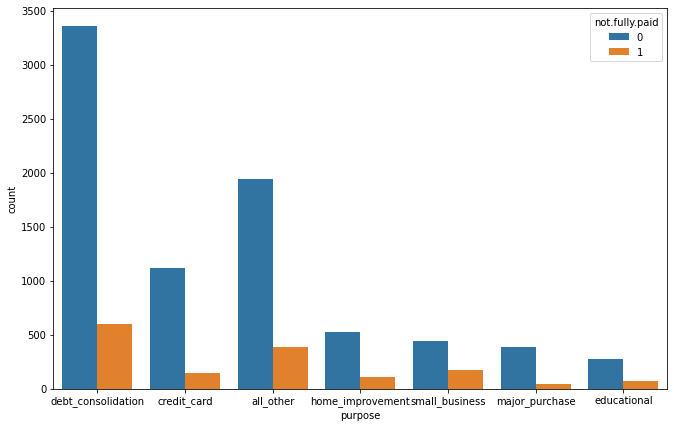

In [6]:
plt.figure(figsize=(11,7))
sns.countplot(loans['purpose'], hue = loans['not.fully.paid'])

In [7]:
new_df = loans.groupby('purpose')['not.fully.paid'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

In [8]:
new_df1 = new_df[new_df["not.fully.paid"]==1]

In [9]:
new_df1=new_df1.sort_values("Percent")

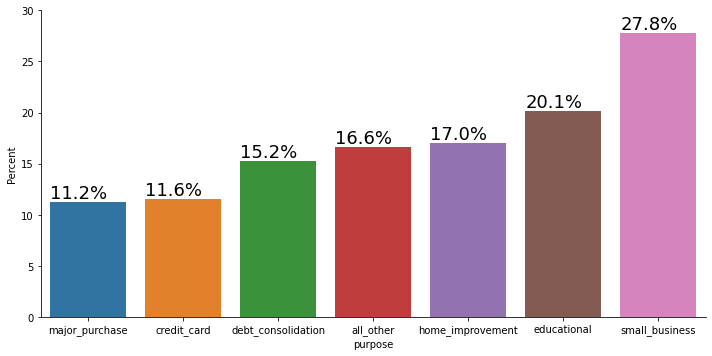

In [10]:
g=sns.catplot(x="purpose", y='Percent', kind='bar', data=new_df1, aspect=2)
g.ax.set_ylim(0,30)


for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,fontsize=18,verticalalignment='bottom',multialignment='right')

No handles with labels found to put in legend.


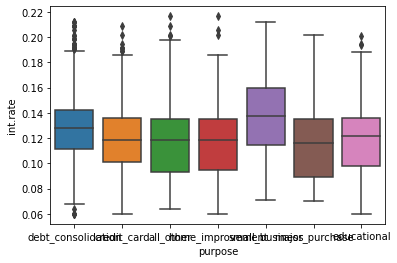

In [11]:
sns.boxplot(data =loans, x ='purpose', y= loans['int.rate']).legend().set_visible(False)

C:\Users\jsiit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Interest Rate Distribution, Credit Policy range based on the Credit policy , General Interest rate


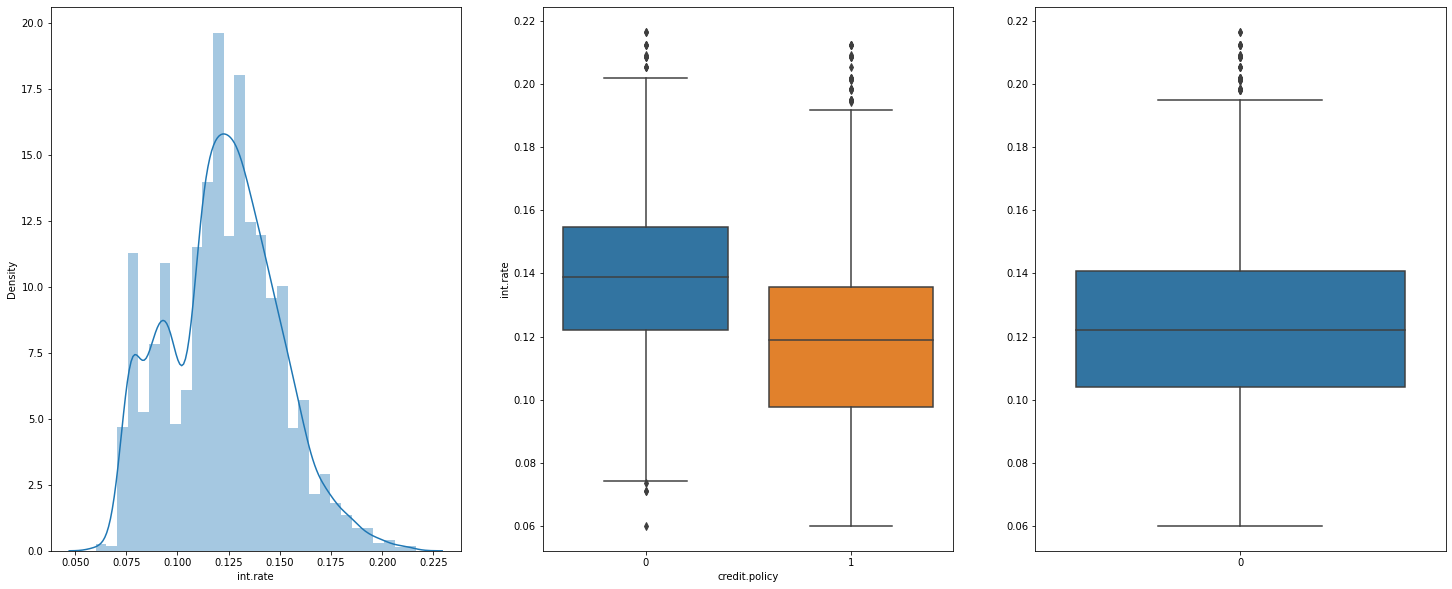

In [12]:
df=loans
f,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(25,10))
sns.distplot(df['int.rate'], bins= 30,ax=ax1)
sns.boxplot(data =df, x ='credit.policy', y= df['int.rate'],ax=ax2).legend().set_visible(False)
sns.boxplot(data = df['int.rate'], ax=ax3)
print("Interest Rate Distribution, Credit Policy range based on the Credit policy , General Interest rate")


Text(0.5, 0, 'FICO')

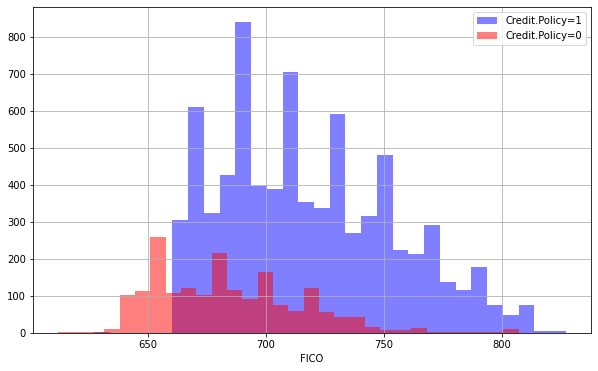

In [13]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

No handles with labels found to put in legend.


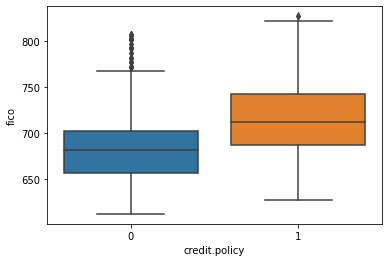

In [14]:
sns.boxplot(data =loans, x ='credit.policy', y= loans['fico']).legend().set_visible(False)

Let's plot a seaborn pairplot between the numerical data:

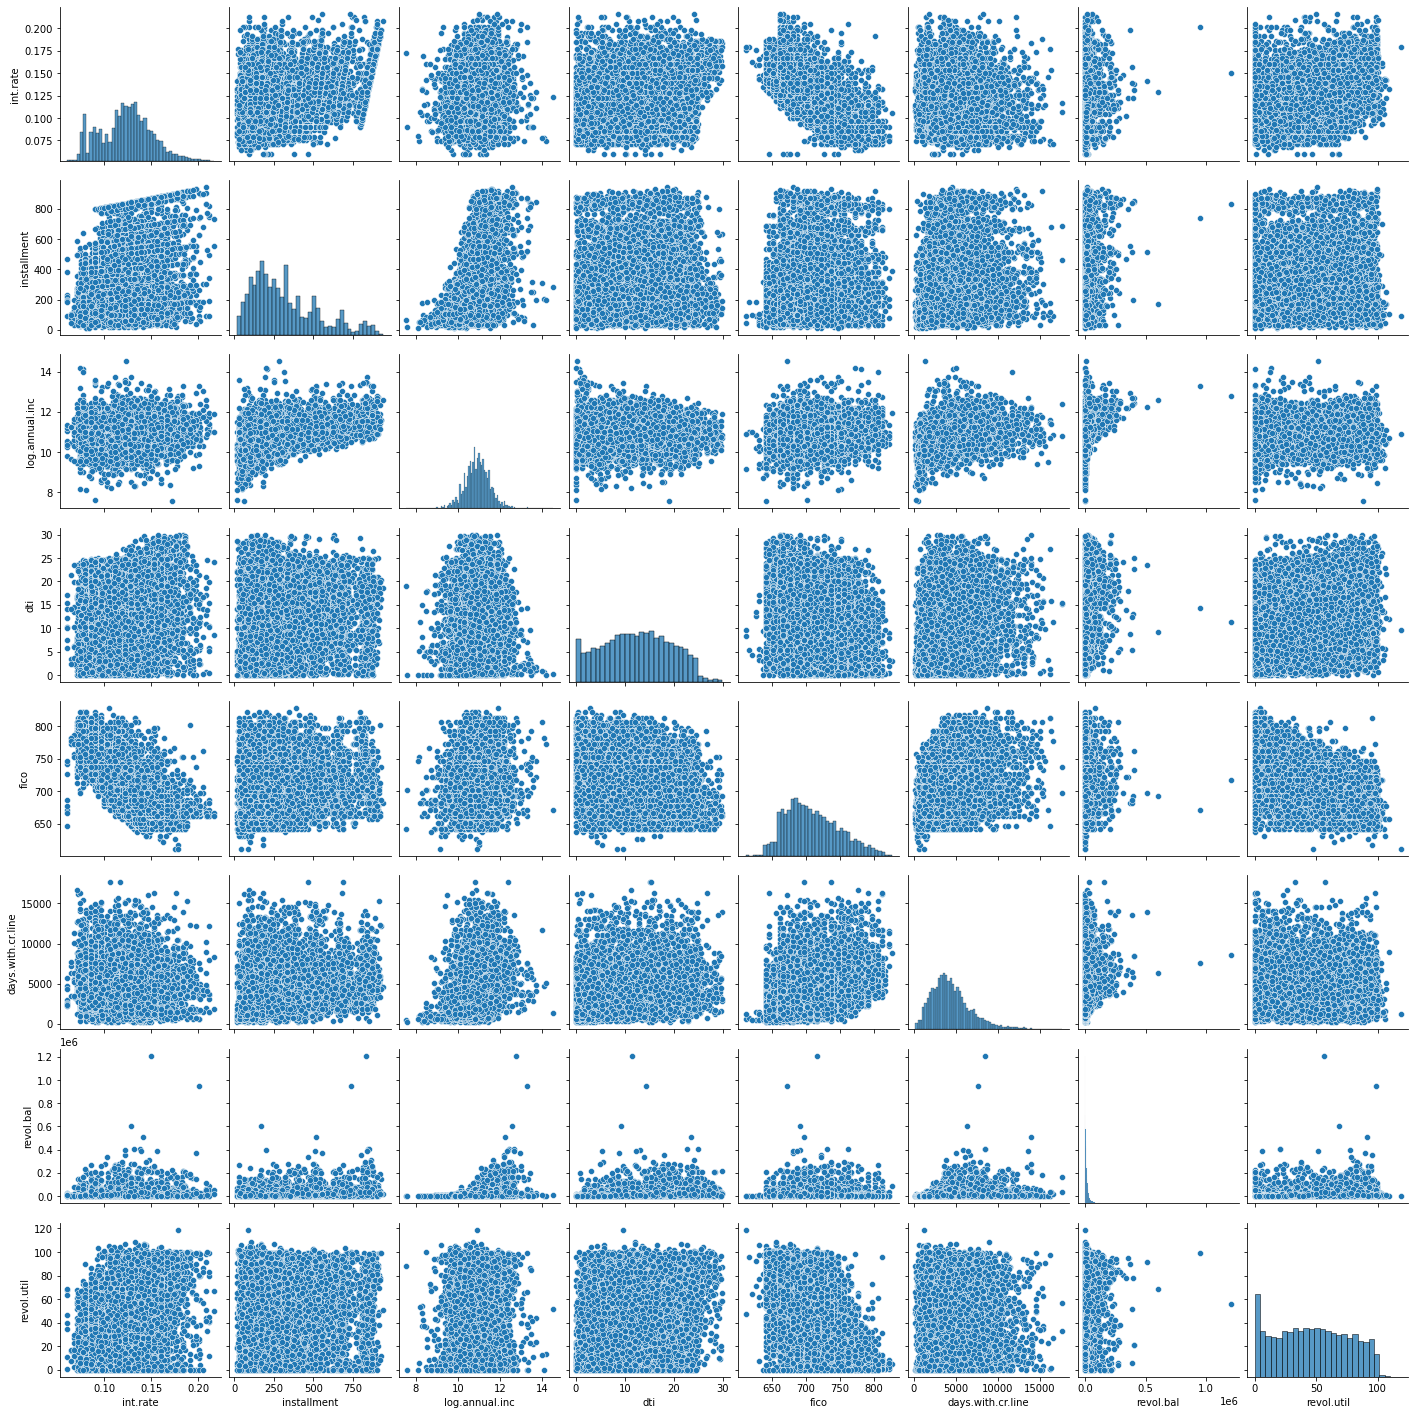

In [15]:
sns.pairplot(loans.drop(['credit.policy', 'purpose',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'], axis=1))

#### Cleaning

Let's transform the 'purpose' column to dummy variables, so that we can include them in our analysis:

In [16]:
final_data = pd.get_dummies(loans,columns = ['purpose'], drop_first=True)

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X= final_data.drop('not.fully.paid', axis=1)
y= final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

### Decision Tree:

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,  random_state=None,
            splitter='best')

In [25]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
pred = dtree.predict(X_test)

#### Evaluation

In [27]:
np.array((pred==y_test)).sum()

2104

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [30]:
print(confusion_matrix(y_test,pred))

[[2000  431]
 [ 339  104]]


### Random Forest:

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
dfor = RandomForestClassifier()

In [33]:
dfor.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
pred2 = dfor.predict(X_test)

####  Evaluation

In [37]:
(y_test == pred2).sum()

2427

We can see that this has made a better prediction than a single tree

In [38]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.42      0.02      0.05       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [39]:
print(confusion_matrix(y_test,pred2))

[[2416   15]
 [ 432   11]]


## Hyper Parameter Tuning ~ Random Forest

- n_estimators : Number of Trees in Random Forest

- max_features : Max Number of Features to be considered at each split

- max_depth : Max Depth of each estimator

- min_sample_split : Minimum Samples required for Valid Split

- min_samples_leaf : Minimum samples required at each leaf node


In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


## K-Fold Cross Validation

The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, we make sure to split our data into a training and a testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data).

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110}

## References

1. https://www.kaggle.com/bdmj12/random-forest-lendingclub-project/notebook
2. https://www.kaggle.com/megr25/lending-club-decision-tree-and-random-forest
3. https://www.kaggle.com/megr25/lending-club-loans/version/1
4. http://www.cs.columbia.edu/~amueller/comsw4995s18/schedule/
5. https://medium.com/@appaloosastore/string-similarity-algorithms-compared-3f7b4d12f0ff
6. https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning